**IMPORTING LIBRARIES**

In [18]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
import pandas_datareader as web

**READING DATA FROM YAHOO FINANCE SOURCE**

In [2]:
data=web.DataReader('AMZN',data_source='yahoo',start='2012-01-01',end='2021-05-15')
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-05-10,3283.000000,3190.000000,3282.320068,3190.489990,5838600,3190.489990
2021-05-11,3238.000000,3127.370117,3136.280029,3223.909912,4619800,3223.909912
2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400,3151.939941


**STATISTICAL DESCRIPTION OF DATA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2357 entries, 2012-01-03 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2357 non-null   float64
 1   Low        2357 non-null   float64
 2   Open       2357 non-null   float64
 3   Close      2357 non-null   float64
 4   Volume     2357 non-null   int64  
 5   Adj Close  2357 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 128.9 KB


In [6]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2357.000000,2357.000000,2357.000000,2357.000000,2.357000e+03,2357.000000
mean,1111.317381,1086.758354,1099.824854,1099.390263,4.110385e+06,1099.390263
std,929.045026,906.149526,918.538145,917.474866,2.231281e+06,917.474866
min,178.250000,172.000000,173.809998,175.929993,8.813000e+05,175.929993
25%,329.440002,321.739990,325.730011,325.619995,2.704800e+06,325.619995
50%,767.739990,757.250000,763.809998,761.010010,3.525600e+06,761.010010
75%,1766.890015,1734.119995,1751.430054,1754.359985,4.782200e+06,1754.359985
max,3554.000000,3486.689941,3547.000000,3531.449951,2.385610e+07,3531.449951


In [7]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [8]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999790,0.999872,0.999846,0.131662,0.999846
Low,0.999790,1.000000,0.999823,0.999860,0.121164,0.999860
Open,0.999872,0.999823,1.000000,0.999687,0.127411,0.999687
Close,0.999846,0.999860,0.999687,1.000000,0.126178,1.000000
Volume,0.131662,0.121164,0.127411,0.126178,1.000000,0.126178
Adj Close,0.999846,0.999860,0.999687,1.000000,0.126178,1.000000


Overall, the adjusted closing price will give you a better idea of the overall value of the stock and help you make informed decisions about buying and selling, while the closing stock price will tell you the exact cash value of a share of stock at the end of the trading day.

In [9]:
df = pd.DataFrame(data, columns=['Adj Close'])
df = df.reset_index()

In [10]:
df.head()

,Date,Adj Close
0,2012-01-03,179.029999
1,2012-01-04,177.509995
2,2012-01-05,177.610001
3,2012-01-06,182.610001
4,2012-01-09,178.559998


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2357 non-null   datetime64[ns]
 1   Adj Close  2357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.0 KB


In [12]:
df.isna().values.any()

False

**VISUALIZATION OF DATA**

1. Box Plot

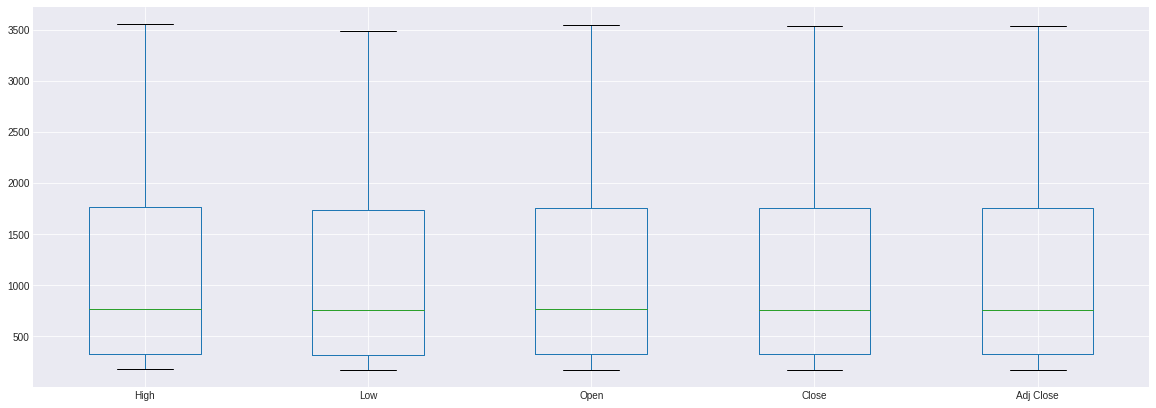

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,7))
boxplot = data.boxplot(column=['High', 'Low', 'Open','Close','Adj Close'])

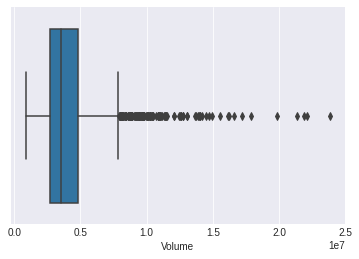

In [ ]:
d = pd.DataFrame(data)
import seaborn as sns
sns.boxplot(x=d['Volume'])

This shows that the volume column contains lot of outlier values which might affect the results of prediction. Hence we remove the volume column itself as part of outlier elimination.

2. Visualization of Adjusted Close Price vs Data

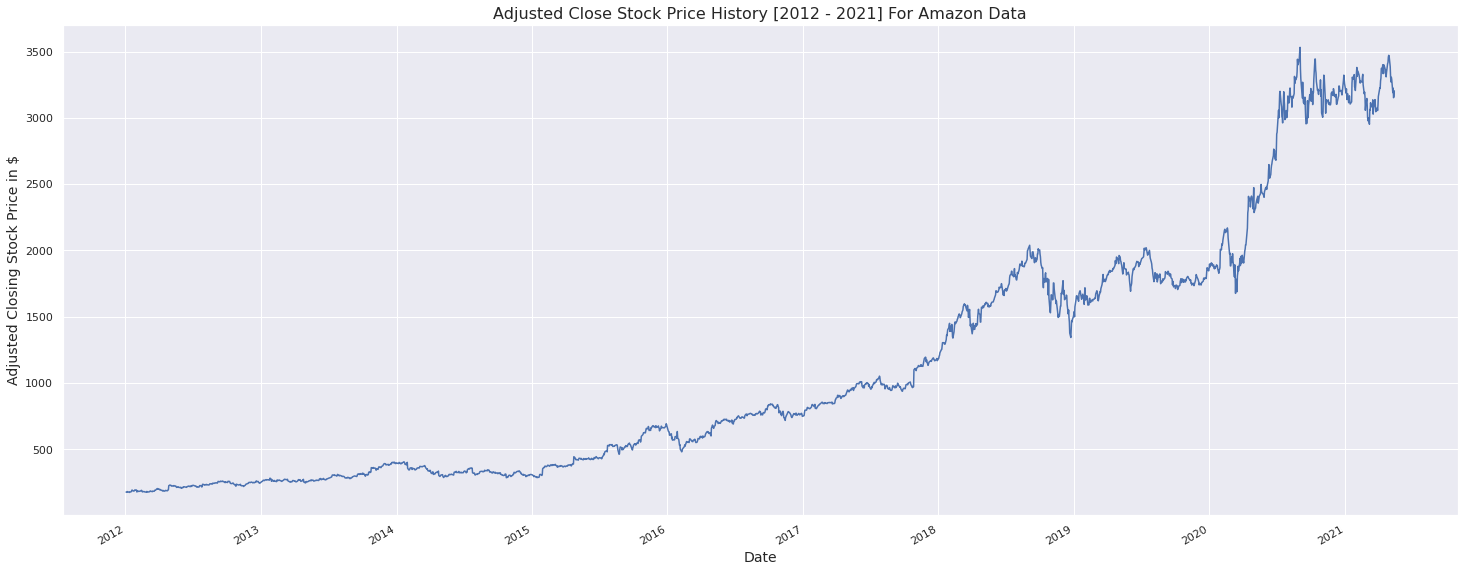

In [ ]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Adj Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Adjusted Close Stock Price History [2012 - 2021] For Amazon Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Adjusted Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

3. CORRELATION BETWEEN VARIABLES

Text(0.5, 1.0, 'Correlation between features')

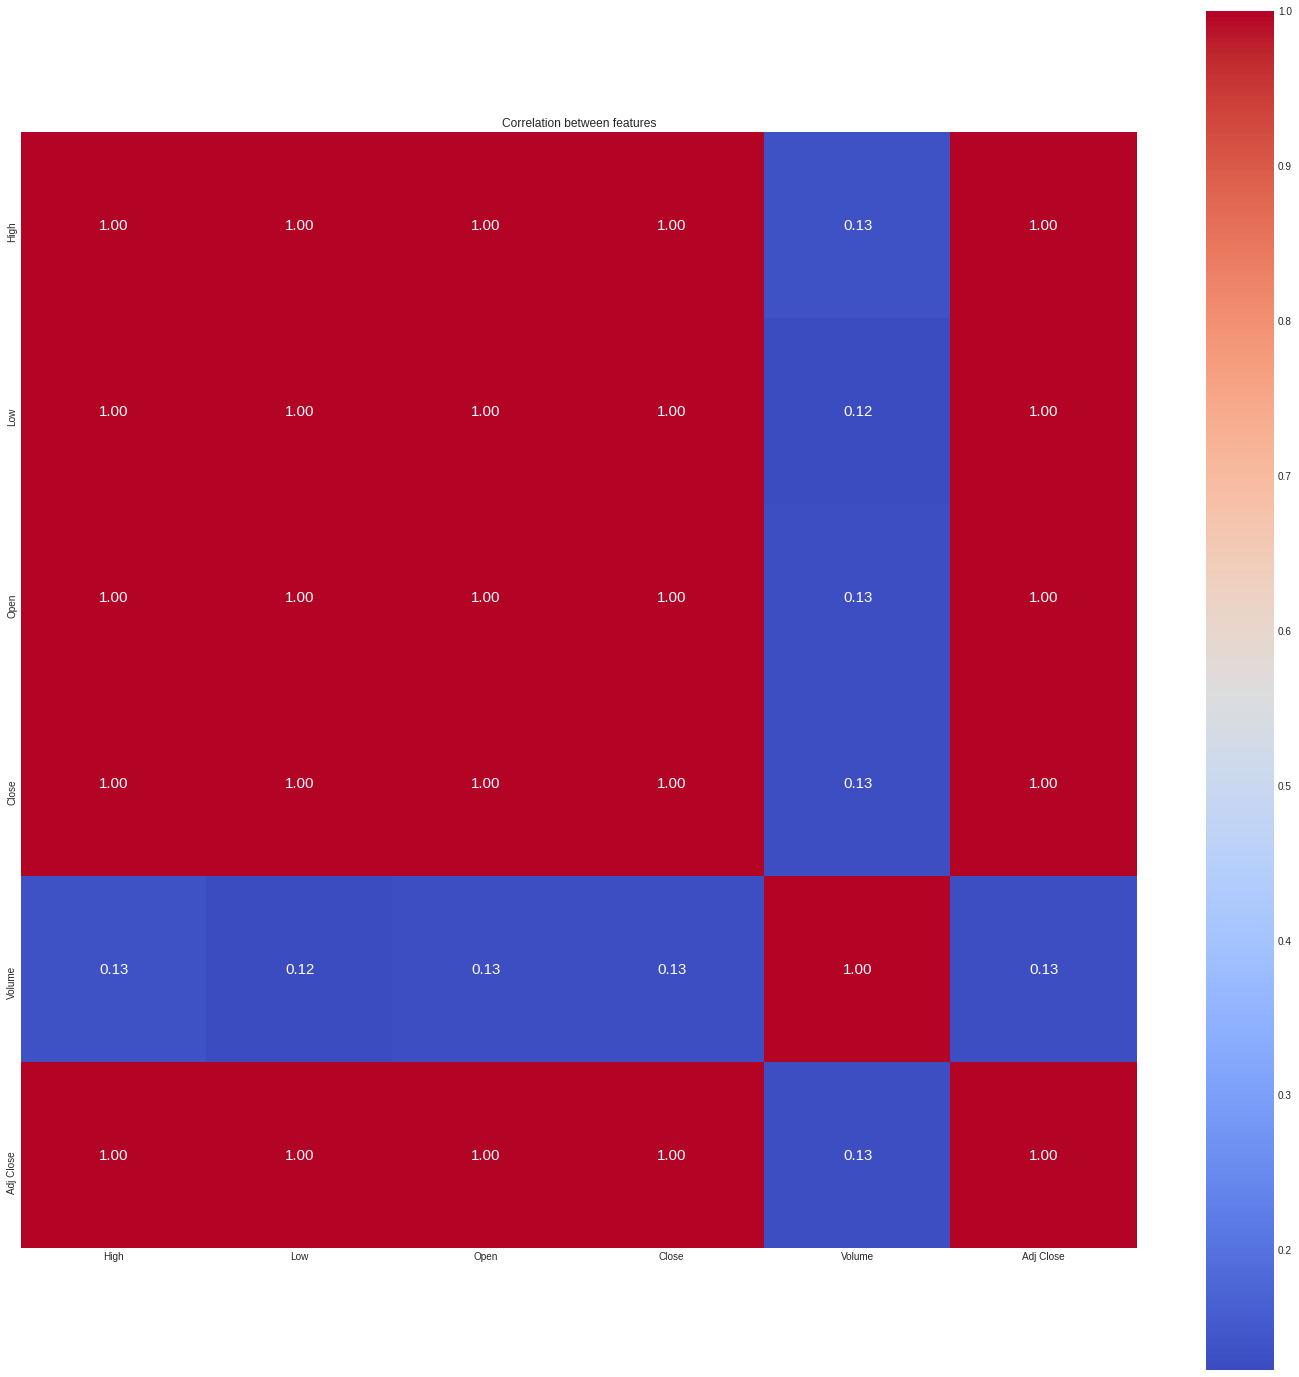

In [ ]:
correlation=data.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features')

**PREDICTING THE ACCURACY OF PREDICTION OF STOCK PRICES USING ML AND DEEP LEARNING**

1. PREDICTION USING LINEAR REGRESSION

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  1.2410877241292309
Intercept:  -361.29068726887795


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


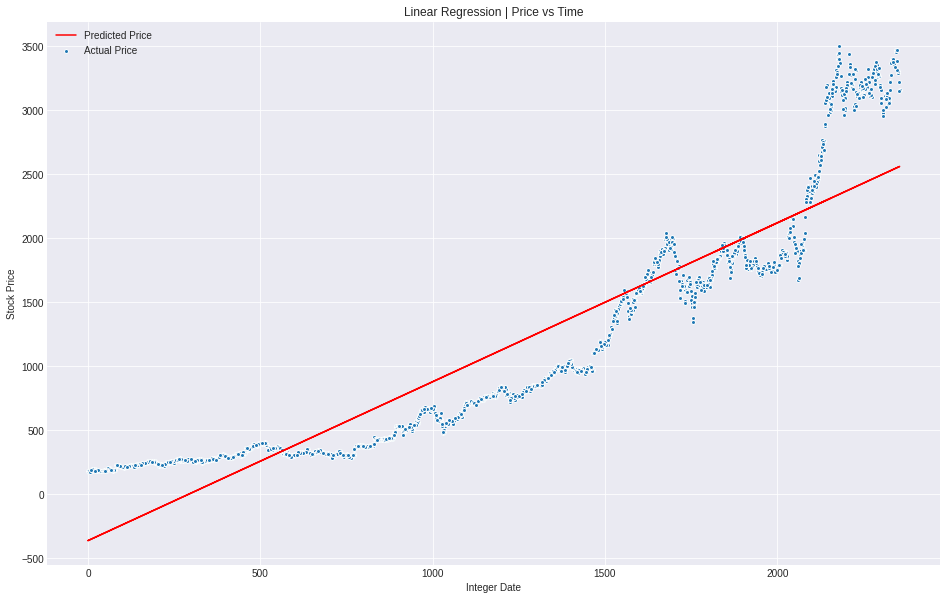

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1877   1918.189941      1968.230971
1028    536.260010       914.547493
1895   1992.030029      1990.570550
2338   3334.689941      2540.372412
274     262.220001       -21.232651
...            ...              ...
1734   1516.729980      1790.755426
283     266.410004       -10.062861
927     522.239990       789.197633
1436    974.190002      1420.911285
494     395.190002       251.806648

[472 rows x 2 columns]


1.1 Calculating the accuracy of the prediction

In [ ]:
from sklearn import metrics
import math
rmse_linear=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_linear=model.score(X_test,y_test)

print("Root mean square error= ",rmse_linear)
print("Accurcy Score= ",accuracy_linear*100)

Root mean square error=  356.6226565419589
Accurcy Score=  84.30219430687926


1.2 Graphichal prediction 

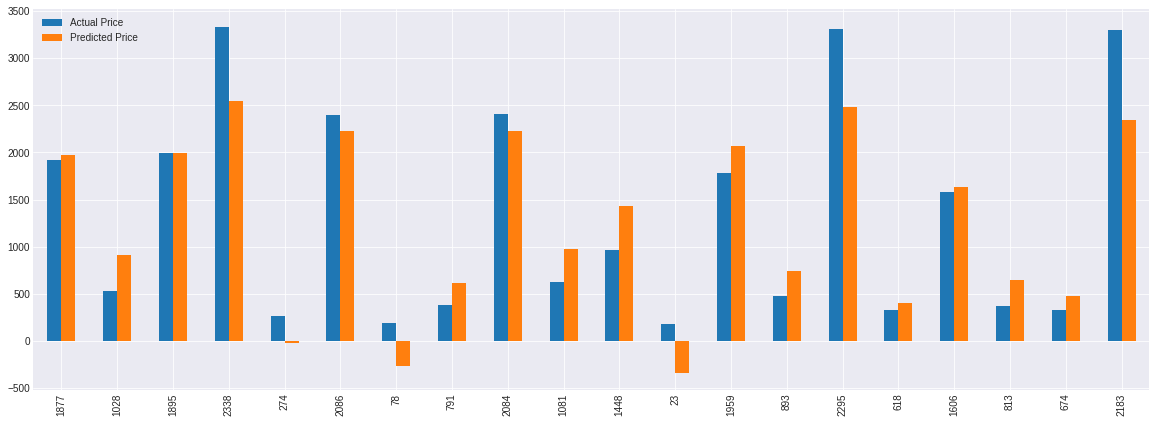

In [ ]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

2.PREDICTION USING KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = KNeighborsRegressor()
model.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
939     504.059998       526.266003
2313   3081.679932      3091.732031
1866   1738.500000      1768.254004
214     227.350006       229.800000
1265    813.640015       803.740002
...            ...              ...
853     431.420013       429.196008
228     251.270004       247.301999
568     327.070007       325.121997
2187   3116.219971      3132.430029
917     500.769989       492.117999

[472 rows x 2 columns]


2.1 Calculating the Accuracy

In [ ]:
from sklearn import metrics
import math
rmse_knn=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_knn=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_knn)
print("Accurcy Score= ",accuracy_knn*100)

Root mean square error=  32.40884642488087
Accurcy Score=  99.8778136604473


2.2 Graphical Representation

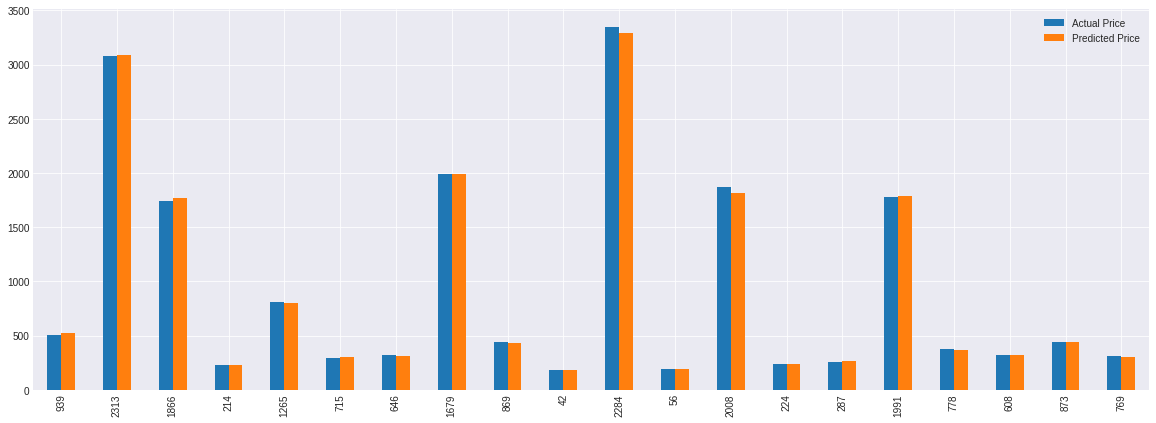

In [ ]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

3.PREDICTION USING DECISION TREE REGRESSOR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model =DecisionTreeRegressor ()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
616     325.619995       327.619995
2084   2408.189941      2375.000000
1580   1441.500000      1430.790039
1940   1821.500000      1817.459961
2129   2675.010010      2653.979980
...            ...              ...
85      223.990005       230.250000
2098   2351.260010      2317.800049
611     332.410004       327.500000
1752   1495.079956      1551.479980
2243   3220.080078      3168.040039

[472 rows x 2 columns]


3.1 Calculating the Accuracy

In [ ]:
from sklearn import metrics
import math
rmse_dt=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_dt=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_dt)
print("Accurcy Score= ",accuracy_dt*100)

Root mean square error=  29.611613999107856
Accurcy Score=  99.90243331966843


3.2 Graphical Representation

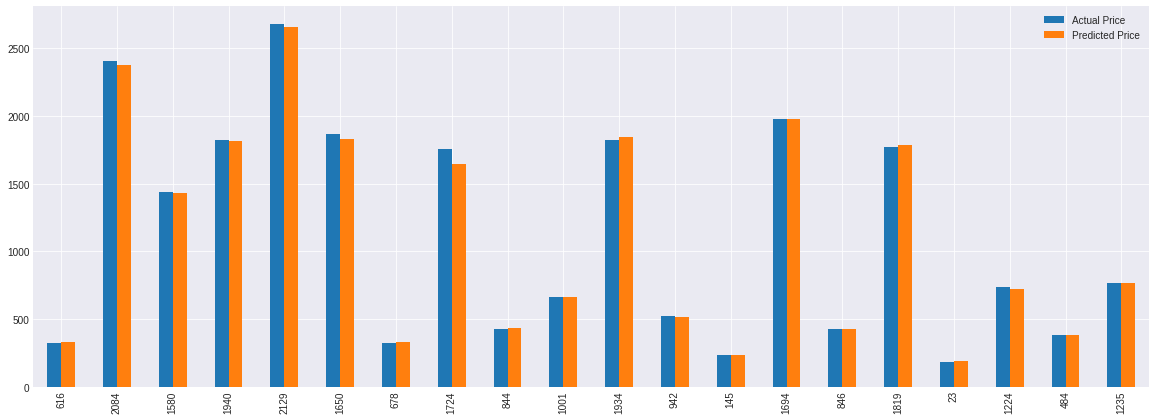

In [ ]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

4.PREDICTION USING LASSO

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import Lasso
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = Lasso()
# Fit linear model using the train data set
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122428228.6467806, tolerance: 158701.00272162864
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
2306   2977.570068      2493.415621
1113    723.739990      1018.402881
1885   1934.310059      1972.895618
1187    789.739990      1109.895708
1380    990.330017      1348.518892
...            ...              ...
2073   1949.719971      2205.336855
195     244.990005      -116.602732
1854   1869.000000      1934.567542
2204   3099.959961      2367.303887
1793   1622.099976      1859.147779

[472 rows x 2 columns]


4.1 Calculating the Accuracy

In [ ]:
from sklearn import metrics
import math
rmse_lasso=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_lasso=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_lasso)
print("Accurcy Score= ",accuracy_lasso*100)

Root mean square error=  356.7883370501204
Accurcy Score=  85.08994381396427


4.2 Graphical Representation

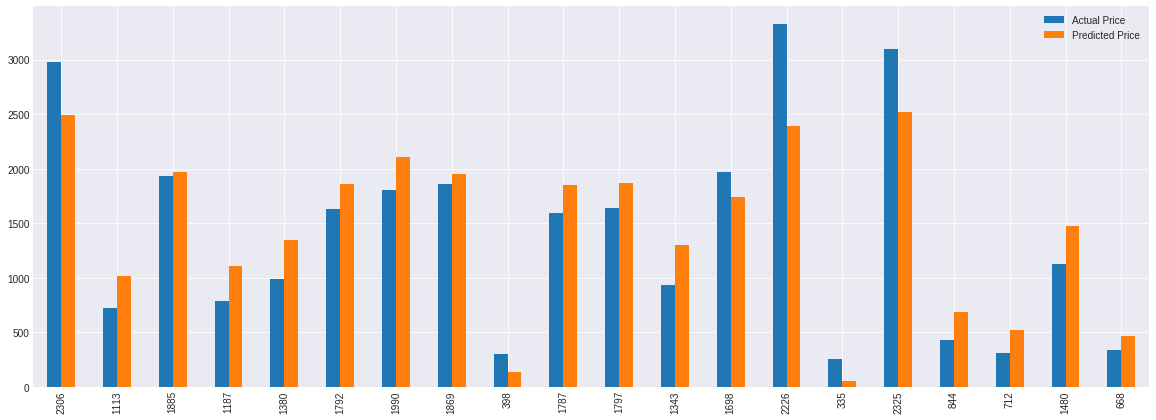

In [ ]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

5. PREDICTION USING ELASTIC NET

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import ElasticNet
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = ElasticNet()
# Fit linear model using the train data set
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126703929.39167291, tolerance: 161901.8083208561
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1433    999.599976      1411.755749
699     308.309998       507.301353
343     264.119995        68.628649
1699   1952.760010      1739.528050
282     269.750000        -6.537179
...            ...              ...
284     265.940002        -4.072726
1741   1772.359985      1791.281572
315     258.950012        34.126302
782     377.170013       609.576169
2292   3262.129883      2470.238482

[472 rows x 2 columns]


5.1 Calculating the Accuracy

In [ ]:
from sklearn import metrics
import math
rmse_el=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_el=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_el)
print("Accurcy Score= ",accuracy_el*100)

Root mean square error=  364.33065142970673
Accurcy Score=  85.01919364138007


5.2 Graphical Representation

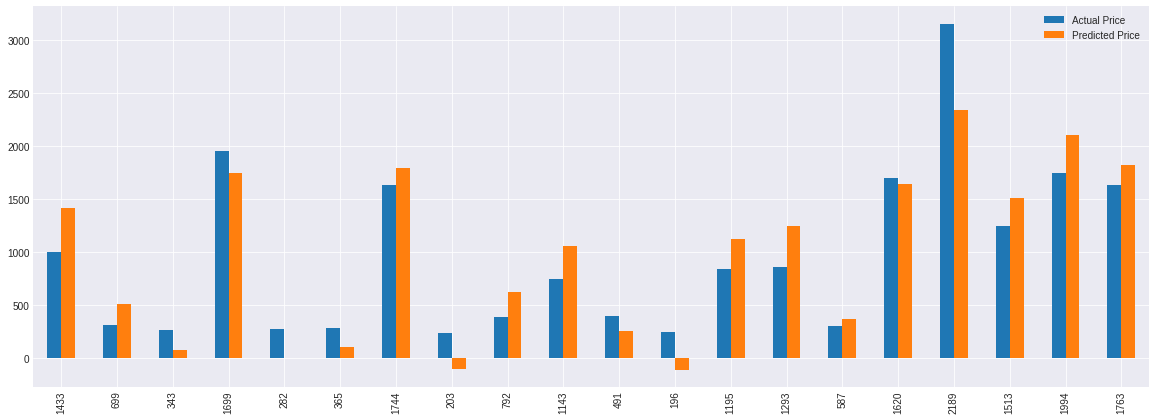

In [ ]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

6. PREDICTION USING LSTM STACKED ESTIMATOR

In [ ]:
df1=data.reset_index()['Adj Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [ ]:
import numpy

def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
 time_step=100
 X_train,y_train=create_dataset(train_data,time_step)
 X_test,ytest=create_dataset(train_data,time_step)

In [ ]:
print(X_train)

[[0.00092385 0.00047087 0.00050067 ... 0.01174185 0.01232298 0.01171503]
 [0.00047087 0.00050067 0.00199075 ... 0.01232298 0.01171503 0.01101469]
 [0.00050067 0.00199075 0.00078378 ... 0.01171503 0.01101469 0.011569  ]
 ...
 [0.23523628 0.23599025 0.2394681  ... 0.35213023 0.35822167 0.36540389]
 [0.23599025 0.2394681  0.23542403 ... 0.35822167 0.36540389 0.37006189]
 [0.2394681  0.23542403 0.23901811 ... 0.36540389 0.37006189 0.37606391]]


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 11s 280ms/step - loss: 0.0072 - val_loss: 2.6901e-04
Epoch 2/100
23/23 [==============================] - 5s 203ms/step - loss: 2.4451e-04 - val_loss: 1.0761e-04
Epoch 3/100
23/23 [==============================] - 5s 203ms/step - loss: 9.4372e-05 - val_loss: 7.2538e-05
Epoch 4/100
23/23 [==============================] - 5s 206ms/step - loss: 7.9847e-05 - val_loss: 6.7964e-05
Epoch 5/100
23/23 [==============================] - 5s 213ms/step - loss: 6.8832e-05 - val_loss: 6.9850e-05
Epoch 6/100
23/23 [==============================] - 5s 211ms/step - loss: 6.2789e-05 - val_loss: 6.3878e-05
Epoch 7/100
23/23 [==============================] - 5s 223ms/step - loss: 6.3420e-05 - val_loss: 6.0514e-05
Epoch 8/100
23/23 [==============================] - 5s 216ms/step - loss: 6.4086e-05 - val_loss: 6.2246e-05
Epoch 9/100
23/23 [==============================] - 5s 220ms/step - loss: 6.8923e-05 - val_loss: 6.9946e-05
Epoch 10/100
23/23 [==

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

6.1 Calculating the Accuracy

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm=math.sqrt(mean_squared_error(ytest,test_predict))
print("RMSE score of LSTM =",rmse_lstm)


RMSE score of LSTM = 595.1815787399557


7.PREDICTION USING FBPROPHET

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from fbprophet import Prophet

In [ ]:
model=Prophet()

In [ ]:
dfb=data.reset_index()

In [ ]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
1,2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2,2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
3,2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
4,2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...,...
2351,2021-05-07,3330.889893,3289.070068,3319.090088,3291.610107,4706800,3291.610107
2352,2021-05-10,3283.000000,3190.000000,3282.320068,3190.489990,5838600,3190.489990
2353,2021-05-11,3238.000000,3127.370117,3136.280029,3223.909912,4619800,3223.909912
2354,2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400,3151.939941


In [ ]:
dfb[['ds','y']]=dfb[['Date','Close']]

In [ ]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999,2012-01-03,179.029999
1,2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995,2012-01-04,177.509995
2,2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001,2012-01-05,177.610001
3,2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001,2012-01-06,182.610001
4,2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998,2012-01-09,178.559998
...,...,...,...,...,...,...,...,...,...
2351,2021-05-07,3330.889893,3289.070068,3319.090088,3291.610107,4706800,3291.610107,2021-05-07,3291.610107
2352,2021-05-10,3283.000000,3190.000000,3282.320068,3190.489990,5838600,3190.489990,2021-05-10,3190.489990
2353,2021-05-11,3238.000000,3127.370117,3136.280029,3223.909912,4619800,3223.909912,2021-05-11,3223.909912
2354,2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400,3151.939941,2021-05-12,3151.939941


In [ ]:
model.fit(dfb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prediction=model.make_future_dataframe(periods=200)

In [ ]:
pre=model.predict(prediction)
print(pre)

             ds        trend  ...  multiplicative_terms_upper         yhat
0    2012-01-03   198.240065  ...                         0.0   149.758064
1    2012-01-04   198.343747  ...                         0.0   151.300601
2    2012-01-05   198.447429  ...                         0.0   150.114363
3    2012-01-06   198.551111  ...                         0.0   148.260361
4    2012-01-09   198.862156  ...                         0.0   150.430663
...         ...          ...  ...                         ...          ...
2551 2021-11-25  4070.538064  ...                         0.0  4050.565568
2552 2021-11-26  4073.321909  ...                         0.0  4050.514713
2553 2021-11-27  4076.105753  ...                         0.0  4040.822792
2554 2021-11-28  4078.889598  ...                         0.0  4042.958105
2555 2021-11-29  4081.673443  ...                         0.0  4057.219270

[2556 rows x 19 columns]


7.1 Calclulating the Accuracy

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse_fb=math.sqrt(mean_squared_error(pre['trend'],pre['yhat']))
print("RMSE error of FBProphet =",rmse_fb)

RMSE error of FBProphet = 53.3775589473013


7.2 Graphical Visualization

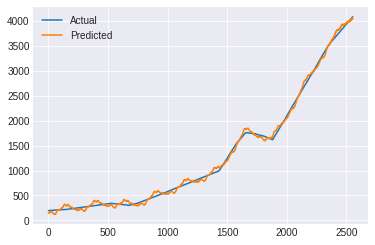

In [ ]:
from matplotlib import pyplot
pyplot.plot(pre['trend'], label='Actual')
pyplot.plot(pre['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

**Evaluation of the Performance of Algorithms**

1. BASED ON THE ACCURACY SCORE

In [ ]:
scores = [accuracy_linear*100,accuracy_lasso*100,accuracy_knn*100,accuracy_el*100,accuracy_dt*100]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Linear Regression is: 84.30219430687926 %
The accuracy score achieved using Lasso Regression is: 85.08994381396427 %
The accuracy score achieved using KNN is: 99.8778136604473 %
The accuracy score achieved using ElasticNet is: 85.01919364138007 %
The accuracy score achieved using Decision Tree Regressor is: 99.90243331966843 %


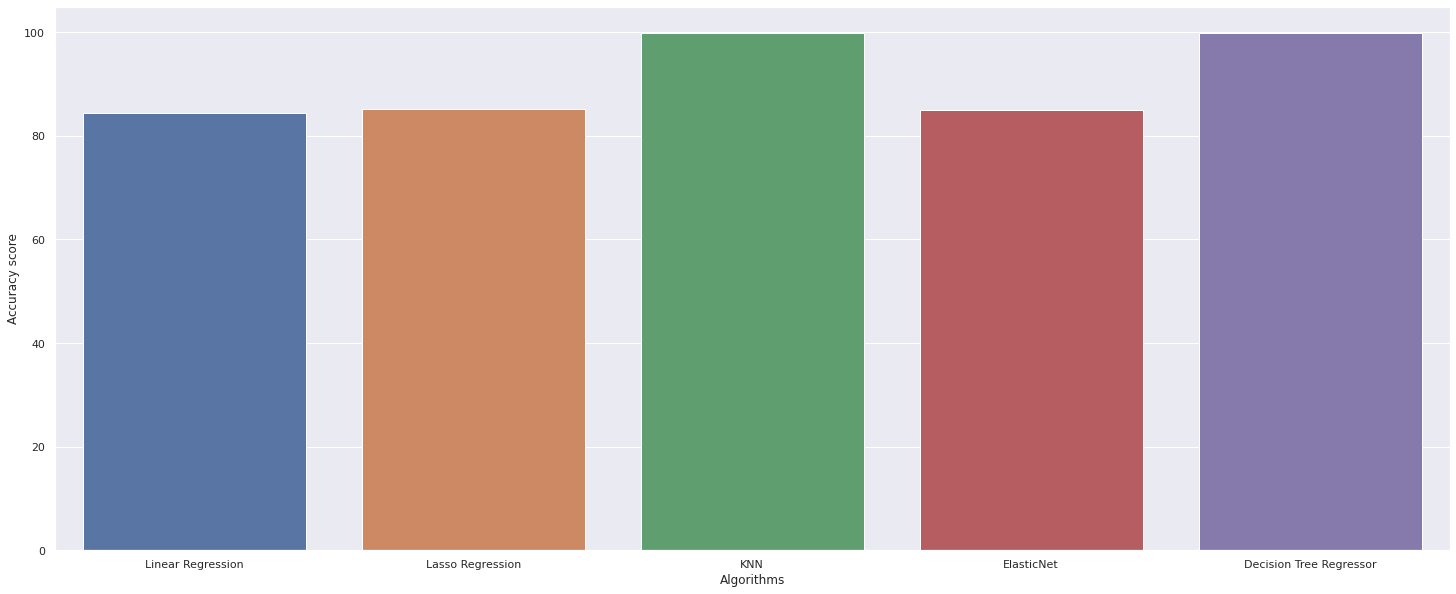

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

2. BASED ON RMSE VALUES

In [ ]:
scores = [rmse_linear,rmse_lasso,rmse_knn,rmse_el,rmse_dt,rmse_lstm,rmse_fb]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor","LSTM","FB PROPHET"]
for i in range(len(algorithms)):
    print("The RMSE score achieved using "+algorithms[i]+" is: "+str(scores[i])+" ")

The RMSE score achieved using Linear Regression is: 356.6226565419589 
The RMSE score achieved using Lasso Regression is: 356.7883370501204 
The RMSE score achieved using KNN is: 32.40884642488087 
The RMSE score achieved using ElasticNet is: 364.33065142970673 
The RMSE score achieved using Decision Tree Regressor is: 29.611613999107856 
The RMSE score achieved using LSTM is: 595.1815787399557 
The RMSE score achieved using FB PROPHET is: 53.3775589473013 


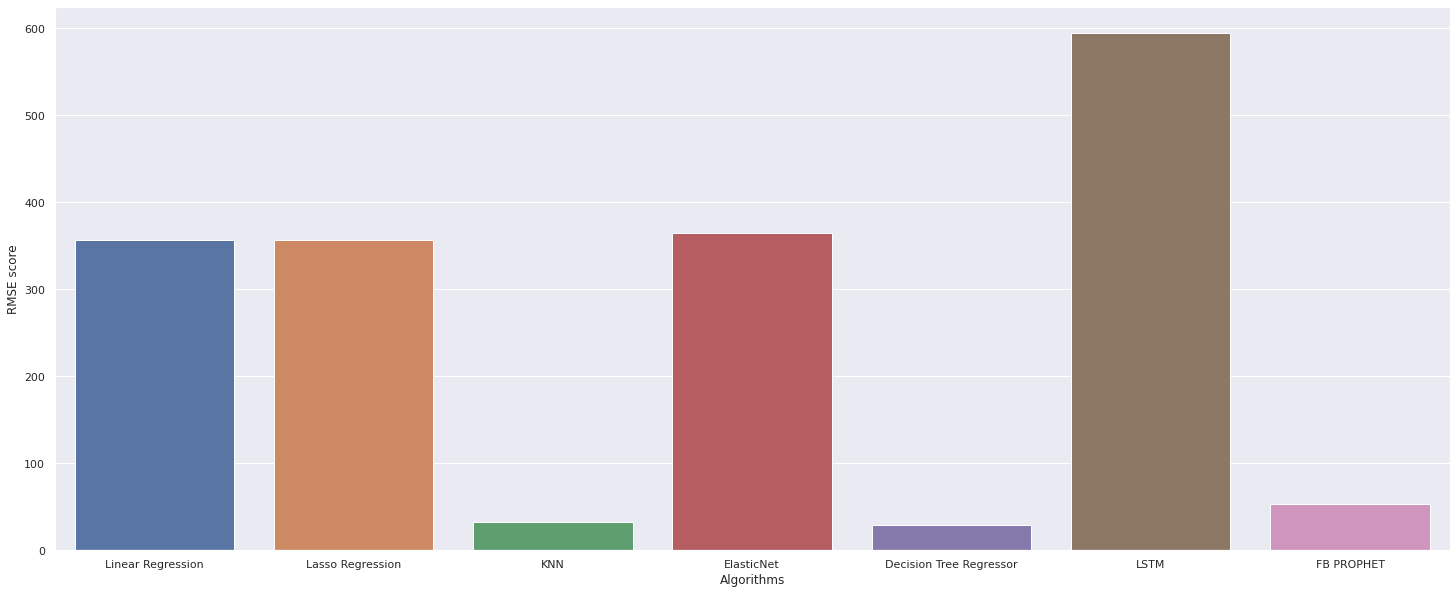

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("RMSE score")

sns.barplot(algorithms,scores)

**FORECASTING THE FUTURE STOCK PRICES USING ML AND DEEP LEARNING**

In [15]:
df=web.DataReader('AMZN',data_source='yahoo',start='2012-01-01',end='2021-05-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-05-10,3283.000000,3190.000000,3282.320068,3190.489990,5838600,3190.489990
2021-05-11,3238.000000,3127.370117,3136.280029,3223.909912,4619800,3223.909912
2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400,3151.939941


1.FORECASTING USING LINEAR REGRESSION

In [16]:
from sklearn import preprocessing
forecast = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence_linear = clf.score(X_test, y_test)

forecast_predicted_linear = clf.predict(X_forecast)
print(forecast_predicted_linear)

[3311.57189501 3268.49823369 3367.91523267 3348.61472233 3462.5657016
 3433.03116814 3446.34379153 3440.03407236 3438.51108328 3466.77555487
 3463.65429946 3427.74817934 3436.64735046 3409.81036637 3417.22038601
 3510.14788051 3497.69744398 3527.66862332 3561.11138453 3567.06290707
 3526.09166894 3429.27883569 3385.3624696  3383.50391488 3345.59250773
 3305.40797601 3336.15264967 3242.11199949 3254.37530655 3270.36723338]


In [21]:
print(confidence_linear*100)

98.34385011662154


(737450.0, 738125.4)

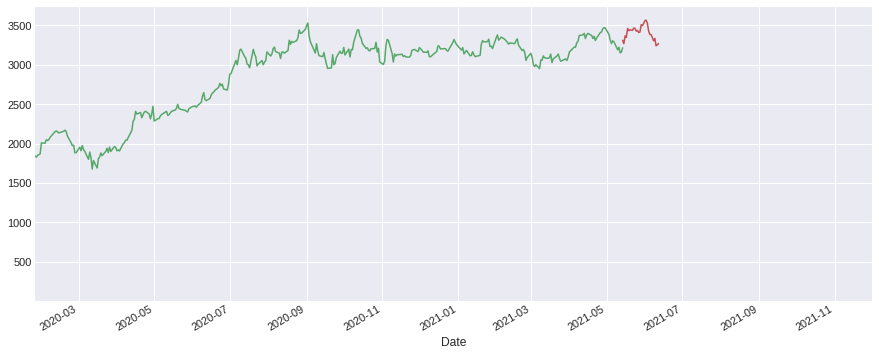

In [22]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_linear,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

2. FORECASTING USING LASSO REGRESSION

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Lasso()
clf.fit(X_train, y_train)

confidence_lasso = clf.score(X_test, y_test)

forecast_predicted_lasso= clf.predict(X_forecast)
print(forecast_predicted_lasso)

[3290.03047669 3299.07665668 3355.73570209 3376.81015016 3429.36114392
 3449.83464316 3484.23140688 3448.90065027 3451.41445234 3463.27401754
 3482.48992881 3431.80464372 3420.2177972  3418.72943852 3426.19316557
 3482.59790294 3510.51676741 3542.62608219 3564.67129443 3596.88237482
 3526.49019363 3414.57427205 3396.37444851 3369.37968393 3380.28553969
 3321.83189613 3290.92547686 3252.76377682 3251.45603716 3276.37126423]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199838.92885650694, tolerance: 159580.24727103324
  positive)


In [26]:
print(confidence_lasso*100)

97.51530727585505


(737450.0, 738125.4)

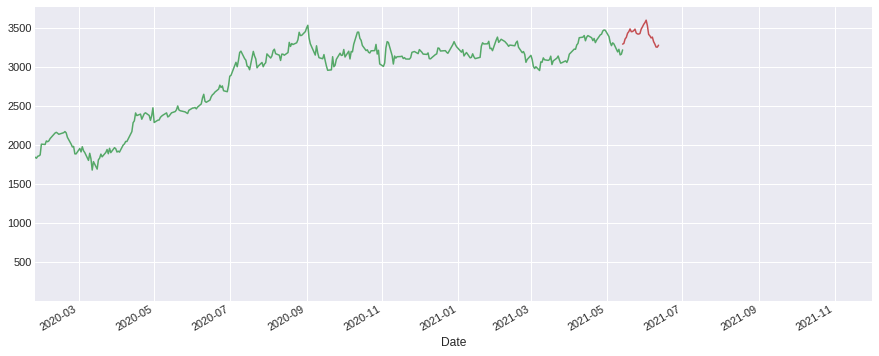

In [27]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_lasso,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

3. FORECASTING USING ELASTIC NET

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = ElasticNet()
clf.fit(X_train, y_train)

confidence_elastic = clf.score(X_test, y_test)

forecast_predicted_elastic= clf.predict(X_forecast)
print(forecast_predicted_elastic)

[3073.53214681 3090.58839896 3128.13680684 3163.73715722 3204.59211546
 3227.4558176  3258.61892241 3215.65306013 3230.54133152 3241.93072218
 3237.76407469 3202.58016719 3194.26336726 3188.01257313 3194.6073542
 3246.70625921 3280.76975795 3308.48932271 3346.43919305 3357.8898191
 3286.45159163 3192.95034028 3162.73175914 3156.14054851 3171.69612465
 3105.62718252 3065.69319142 3045.11749103 3040.69792143 3065.50892638]


In [30]:
print(confidence_elastic*100)

97.06341642531152


(737450.0, 738125.4)

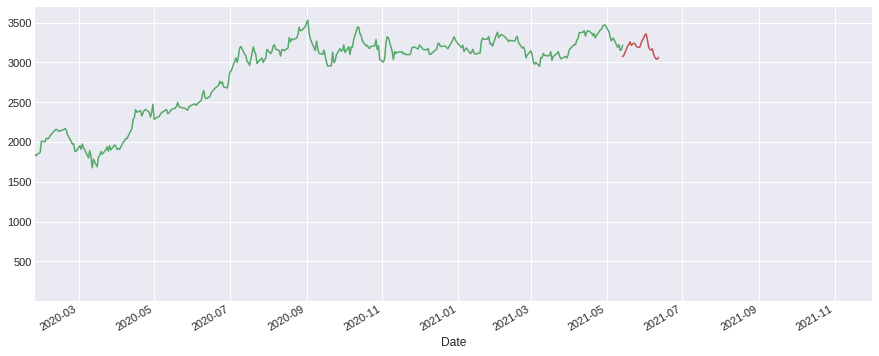

In [31]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_elastic,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

4.FORECASTING USING KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = KNeighborsRegressor()
clf.fit(X_train, y_train)

confidence_knn = clf.score(X_test, y_test)

forecast_predicted_knn= clf.predict(X_forecast)
print(forecast_predicted_knn)

[3179.06401367 3200.27597656 3193.25600586 3170.48798828 3162.98999023
 3156.23203125 3208.79399414 3222.64399414 3226.00200195 3226.00200195
 3214.88598633 3203.04799805 3211.65400391 3203.04799805 3159.05800781
 3152.81396484 3250.95195312 3286.20390625 3181.83398438 3177.01801758
 3178.1340332  3153.25200195 3164.87402344 3169.19799805 3136.46396484
 3298.1340332  3227.99995117 3133.1659668  3171.5699707  3237.59799805]


In [33]:
print(confidence_knn*100)

98.08296234271074


(737450.0, 738125.4)

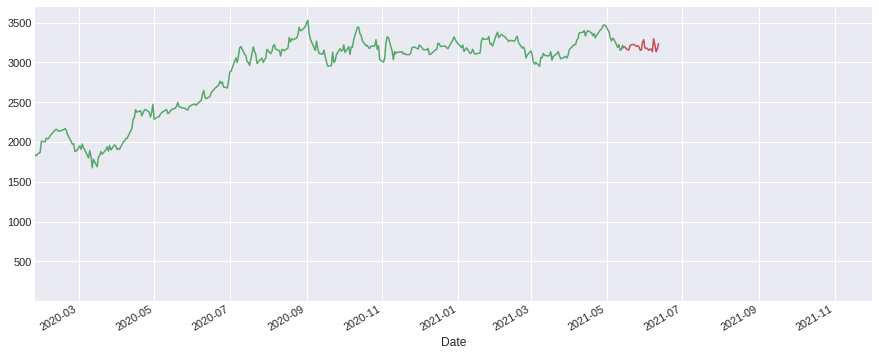

In [34]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

5.FORECASTING USING DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

confidence_dt = clf.score(X_test, y_test)

forecast_predicted_dt = clf.predict(X_forecast)
print(forecast_predicted_dt)

[3328.22998047 3075.72998047 3268.94995117 2951.94995117 3262.12988281
 3094.08007812 3442.92993164 3137.5        3137.5        3137.5
 2951.94995117 2951.94995117 2951.94995117 2951.94995117 3137.5
 3190.55004883 3443.62988281 3443.62988281 3118.06005859 3118.06005859
 3118.06005859 3099.95996094 3199.19995117 3203.5300293  3201.64990234
 3312.5300293  2977.57006836 3180.73999023 3180.73999023 3075.72998047]


In [36]:
print(confidence_dt*100)

97.87171529948864


(737450.0, 738125.4)

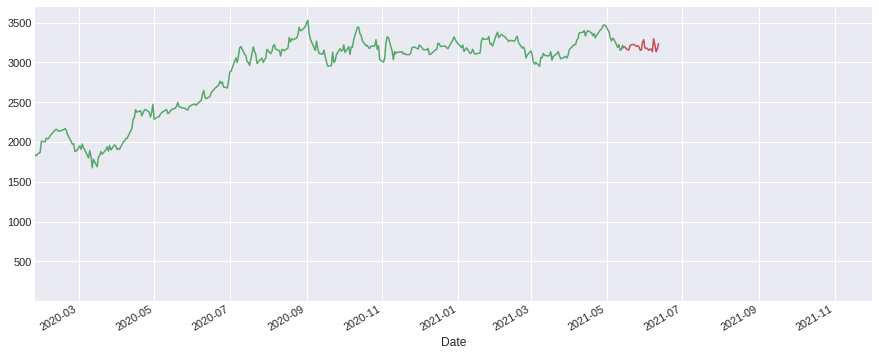

In [37]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

In [38]:
compare=pd.DataFrame({'Linear Regression':forecast_predicted_linear,'Lasso':forecast_predicted_lasso,'Decision tree Regressor':forecast_predicted_dt,'Elastic Net':forecast_predicted_elastic,'K Neighbhors Regressor':forecast_predicted_knn})

In [39]:
compare.head(20)

,Linear Regression,Lasso,Decision tree Regressor,Elastic Net,K Neighbhors Regressor
0,3311.571895,3290.030477,3328.229980,3073.532147,3179.064014
1,3268.498234,3299.076657,3075.729980,3090.588399,3200.275977
2,3367.915233,3355.735702,3268.949951,3128.136807,3193.256006
3,3348.614722,3376.810150,2951.949951,3163.737157,3170.487988
4,3462.565702,3429.361144,3262.129883,3204.592115,3162.989990
5,3433.031168,3449.834643,3094.080078,3227.455818,3156.232031
6,3446.343792,3484.231407,3442.929932,3258.618922,3208.793994
7,3440.034072,3448.900650,3137.500000,3215.653060,3222.643994
8,3438.511083,3451.414452,3137.500000,3230.541332,3226.002002
9,3466.775555,3463.274018,3137.500000,3241.930722,3226.002002


**EVALUATION OF PERFORMANCE IN FORECASTING**

In [40]:
scores = [confidence_linear,confidence_lasso,confidence_knn,confidence_elastic,confidence_dt]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The confidence scores achieved using "+algorithms[i]+" is: "+str(scores[i]*100)+"%")

The confidence scores achieved using Linear Regression is: 98.34385011662154%
The confidence scores achieved using Lasso Regression is: 97.51530727585505%
The confidence scores achieved using KNN is: 98.08296234271074%
The confidence scores achieved using ElasticNet is: 97.06341642531152%
The confidence scores achieved using Decision Tree Regressor is: 97.87171529948864%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


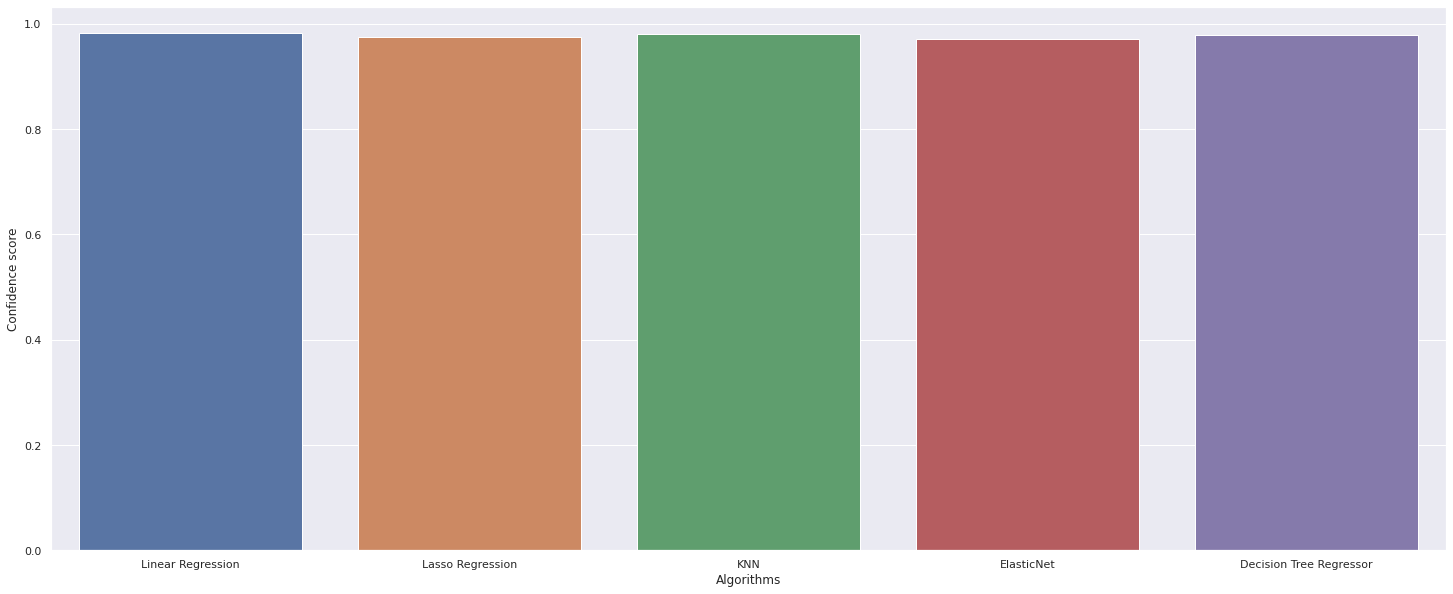

In [41]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Confidence score")

sns.barplot(algorithms,scores)